In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
!pip install -U tensorflow-addons
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools
import random
%matplotlib inline
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 14.8 MB/s 


In [ ]:
!pip install astroNN 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.3 MB 15.3 MB/s 
     |████████████████████████████████| 4.5 MB 9.3 MB/s 
     |████████████████████████████████| 832 kB 51.3 MB/s 
     |████████████████████████████████| 48 kB 5.9 MB/s 
     |████████████████████████████████| 4.0 MB 40.2 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284595 sha256=9a7cff6db469e8165c16f49576bd8bf2168bc6fe306420c54295aa6b8d075c2c
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
Successfully built astroNN


In [ ]:
from astroNN.datasets import load_galaxy10

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [ ]:
images, labels = load_galaxy10()
print(labels)
label = utils.to_categorical(labels, 10)

Galaxy10.h5:  99%|█████████▉| 208M/210M [00:08<00:00, 32.4MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:09, 22.1MB/s]                           


[2 2 4 ... 2 9 2]


In [ ]:
label = label.astype(np.float32)
images = images.astype(np.float32)

Divide data into train and test sets

In [ ]:
train_x, test_x = train_test_split(np.arange(labels.shape[0]), test_size = 0.1)
train_images, train_labels, test_images, test_labels = images[train_x], label[train_x], images[test_x], label[test_x]

In [ ]:
print (len(train_x))
print (len(test_x))
print (len(train_labels))

print(train_labels.shape)
print(train_images.shape)
print(test_images.shape)

print(train_labels.shape)
print(test_labels.shape)

19606
2179
19606
(19606, 10)
(19606, 69, 69, 3)
(2179, 69, 69, 3)
(19606, 10)
(2179, 10)


Storing the various labels

In [ ]:
imageLabel = ["Distirbed", "Merging", "Round Smooth", "In-between Round Smooth", 
              "Cigar Shaped smooth", "Barred Spiral", "Unbarred tight spiral", "Unbared loose spiral", "Edge-on Galaxies without bulge",
              "Edge-on Galacies with Bulge"]

Displaying the various classes

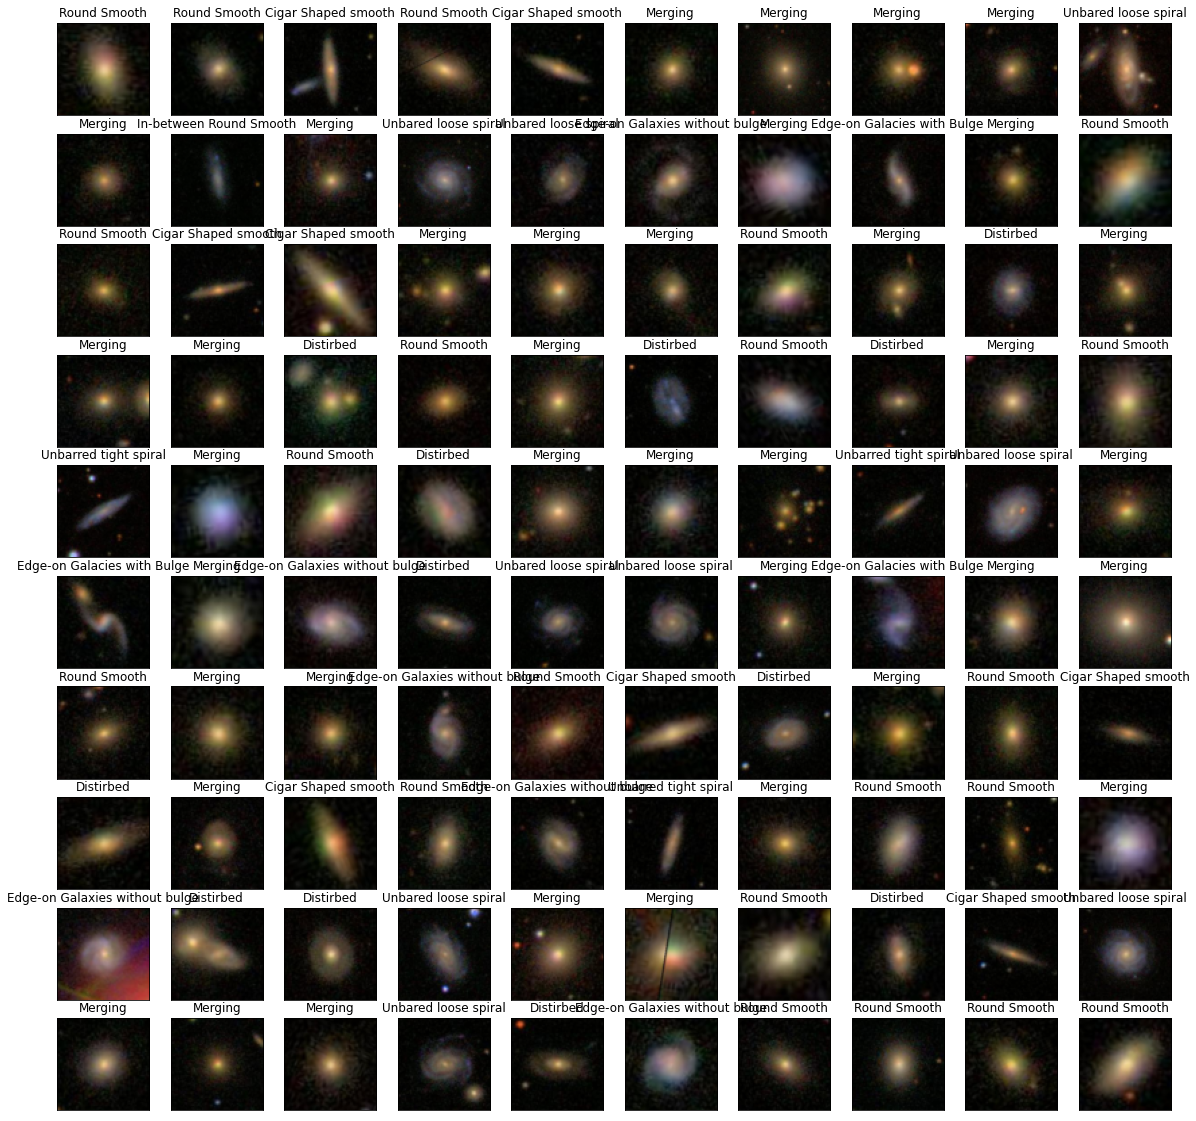

In [ ]:
fig, axes = plt.subplots(ncols = 10, nrows = 10, figsize = (20,20))
index = 0
for i in range(10):
  for j in range(10):
    axes[i,j].set_title(imageLabel[labels[index]])
    axes[i,j].imshow(images[index].astype(np.uint8))
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index +=1
plt.show()

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(19606, 69, 69, 3)
(19606, 10)


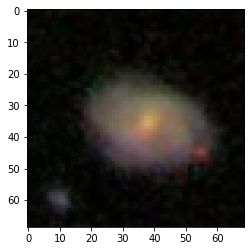

In [ ]:
plt.imshow(train_images[0].astype(np.uint8))
print (labels[0])
print (label[0])
print (train_images.shape)
print(train_labels.shape)

Creating numpy arrays to store the train and test data

In [ ]:
X_train = []
X_test = []
y_train = []
y_test = []


X_train = np.array(train_images)
X_test = np.array(test_images)

y_train = np.array(train_labels)

# #X_test.reshape(-1, image_size, image_size, 1)

y_test = np.array(test_labels)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
# Value normalization
# X_train  = X_train/255
# X_test  = X_test/255
print(np.size(X_train))

(19606, 69, 69, 3)
(2179, 69, 69, 3)
(2179, 10)
280032498


In [ ]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

Provide the number of classes and the input shape to the vision transfortmer

In [ ]:
num_classes = 10
input_shape = (69, 69, 3)

Parameters of the vision transformer

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 70
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

data_augmentation.layers[0].adapt(X_train)
print("Size is: ", np.size(X_train))

datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=30, zoom_range=0.2,
                             width_shift_range=0.1, height_shift_range=0.1,
                             horizontal_flip=True, vertical_flip=False)
# rotate, flip ..... and then fit the training data
datagen.fit(X_train)
print("Size is: ", X_train.shape)

Size is:  280032498
Size is:  (19606, 69, 69, 3)


In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


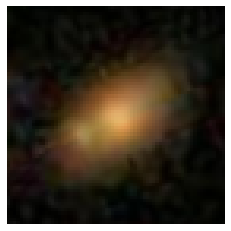

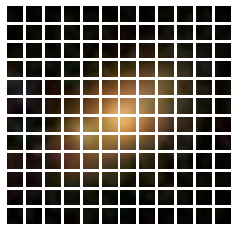

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

Function to generate the confusion matrix

In [ ]:
def plot_confusionM(cm, class_names):
    figure = plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Epoch 1/70
69/69 [==============================] - 46s 484ms/step - loss: 2.5906 - accuracy: 0.3166 - val_loss: 1.3413 - val_accuracy: 0.4258
Epoch 2/70
69/69 [==============================] - 33s 474ms/step - loss: 1.3966 - accuracy: 0.4336 - val_loss: 1.1762 - val_accuracy: 0.5533
Epoch 3/70
69/69 [==============================] - 32s 470ms/step - loss: 1.2774 - accuracy: 0.5046 - val_loss: 1.0863 - val_accuracy: 0.5880
Epoch 4/70
69/69 [==============================] - 33s 473ms/step - loss: 1.2134 - accuracy: 0.5366 - val_loss: 1.0682 - val_accuracy: 0.6191
Epoch 5/70
69/69 [==============================] - 33s 474ms/step - loss: 1.1558 - accuracy: 0.5623 - val_loss: 0.9902 - val_accuracy: 0.6543
Epoch 6/70
69/69 [==============================] - 33s 475ms/step - loss: 1.1087 - accuracy: 0.5811 - val_loss: 0.9630 - val_accuracy: 0.6553
Epoch 7/70
69/69 [==============================] - 33s 476ms/step - loss: 1.0688 - accuracy: 0.6011 - val_loss: 0.9774 - val_accuracy: 0.6497

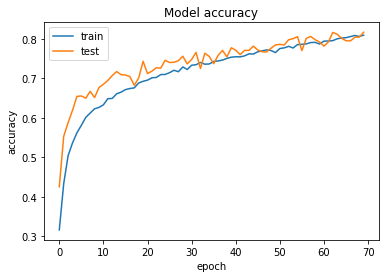

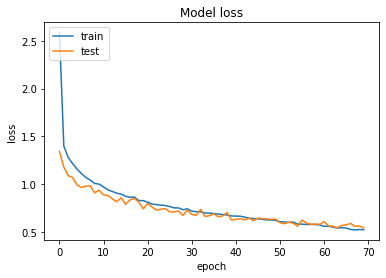

69/69 [==============================] - 2s 22ms/step
[[256  22  37   3   5   0   0  53  22  16]
 [ 31 637  59   0   0   0   0   2   0   0]
 [ 32  18 539   1   5   0   0   5   0   0]
 [  3   0   0  14   0   0   2   0   0   0]
 [  7   0   1  11 158   1  12   1   0   1]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   5   1  40   0   0   1]
 [  2   2   1   0   0   0   0  41   5   0]
 [  5   0   0   0   0   0   0   9  48   6]
 [  5   0   0   0   0   0   1   0  11  41]]
precision and recall: (0.920863309352518, 0.89198606271777)


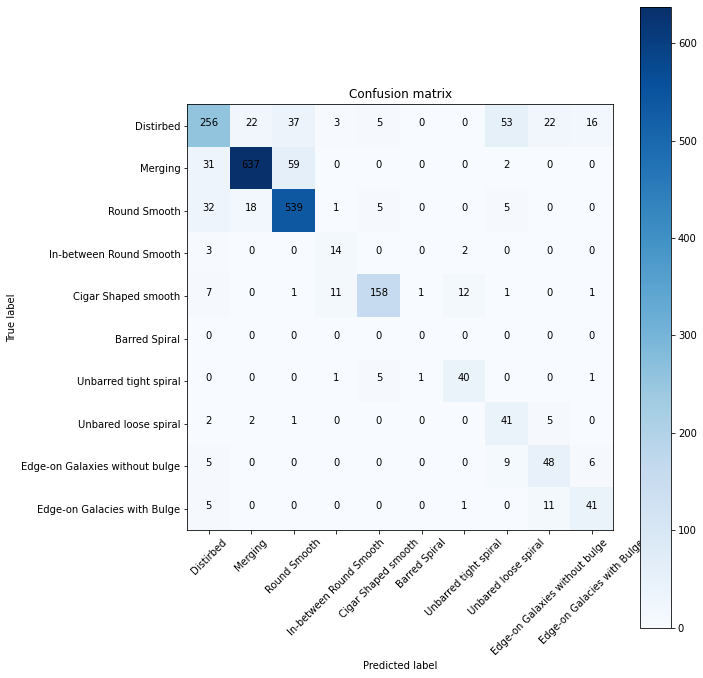

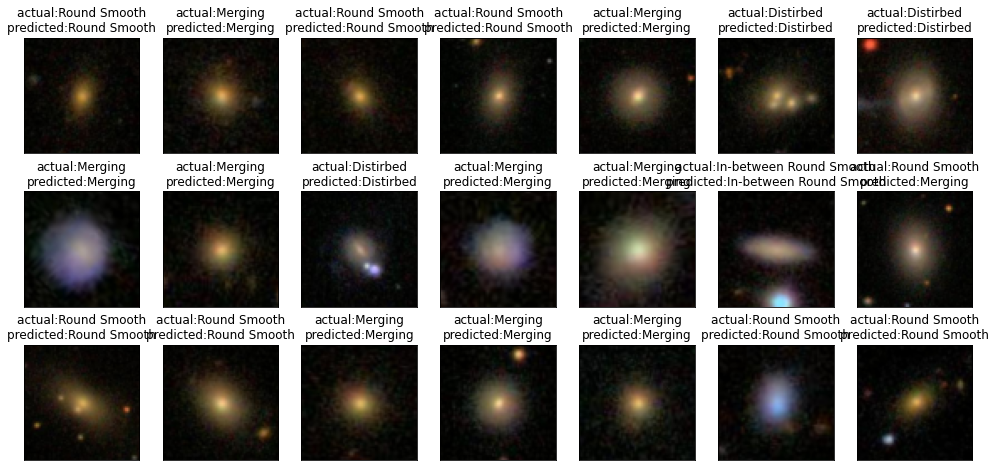

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix


def myscores(smat): 
    tp = smat[0][0] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[1][1] 
    return tp/(tp+fp), tp/(tp+fn)


def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.CategoricalAccuracy(name="accuracy"),
        ],
    )

    # checkpoint_filepath = "/tmp/checkpoint"
    # checkpoint_callback = keras.callbacks.ModelCheckpoint(
    #     checkpoint_filepath,
    #     monitor="val_accuracy",
    #     save_best_only=True,
    #     save_weights_only=True,
    # )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
    )


    y_test_arg =np.argmax(y_test,axis=1)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(y_test_arg, Y_pred))
    # Let’s also print the classification report to get more detailed results. (save it to pickel , early stopping)
    target_names = ["Distirbed", "Merging", "Round Smooth", "In-between Round Smooth", 
              "Cigar Shaped smooth", "Barred Spiral", "Unbarred tight spiral", "Unbared loose spiral", "Edge-on Galaxies without bulge",
              "Edge-on Galacies with Bulge"]
    # print(classification_report(y_test, predictions, target_names=target_names))
    #print(classification_report(y_test, predictions, target_names=target_names))
    
  
    fig = plt.gcf()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    fig = plt.gcf()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    pred = model.predict(X_test)
    pred_label = np.argmax(pred, axis=1)
    actual_label = np.argmax(test_labels, axis=1)

    cm = confusion_matrix(pred_label+1, actual_label+1)
    print (cm)
    print("precision and recall:", myscores(cm))
    plot_confusionM(cm, imageLabel)

    fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
    index = 0
    for i in range(3):
        for j in range(7):
            axes[i,j].set_title('actual:' + imageLabel[actual_label[index]] + '\n' 
                                + 'predicted:' + imageLabel[pred_label[index]])
            axes[i,j].imshow(test_images[index].astype(np.uint8), cmap='gray')
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            index += 1
    plt.show()

    # model.load_weights(checkpoint_filepath)
    # _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    # print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    # print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

In [ ]:
! pip install astroNN
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
images, labels = galaxy10.load_data()

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

x_train = x_train / 255.0
x_test = x_test / 255.0

/root/.astroNN/datasets/Galaxy10.h5 was found!


In [ ]:
print(x_train.shape)
print( x_test.shape)

In [ ]:
fig = plt.figure(figsize=(20,20)) 

for i in range(25):
    plt.subplot(5,5,i+1)    
    plt.imshow(x_train[i])
    plt.title(features[y_train[i]])
    fig.tight_layout(pad=3.0)
    
plt.show()

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=30, zoom_range=0.2,
                             width_shift_range=0.1, height_shift_range=0.1,
                             horizontal_flip=True, vertical_flip=False)
# rotate, flip ..... and then fit the training data
datagen.fit(x_train)

In [ ]:
df = pd.DataFrame(data=labels)

counts = df.value_counts().sort_index()
print(counts)

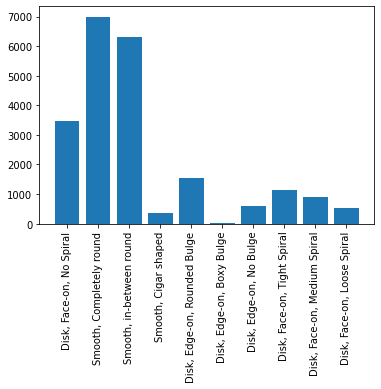

In [ ]:
def class_distribution(x, y, labels):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xticklabels(labels, rotation=90)
    plt.show()
    
class_distribution(features, counts, features)

In [ ]:
base_model = tf.keras.applications.EfficientNetB7(input_shape=(69, 69, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = tf.keras.Sequential([base_model, tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer=keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=80, validation_data=(x_test, y_test))

predictions = np.argmax(model.predict(x_test), axis=-1)

# Regain the original shape to evaluate predictions
predictions = predictions.reshape(1, -1)[0]

Epoch 1/80
545/545 [==============================] - 11s 16ms/step - loss: 1.2859 - accuracy: 0.4881 - val_loss: 1.0489 - val_accuracy: 0.5821
Epoch 2/80
545/545 [==============================] - 7s 12ms/step - loss: 1.0868 - accuracy: 0.5558 - val_loss: 1.0017 - val_accuracy: 0.6027
Epoch 3/80
545/545 [==============================] - 7s 12ms/step - loss: 1.0409 - accuracy: 0.5765 - val_loss: 0.9769 - val_accuracy: 0.6117
Epoch 4/80
545/545 [==============================] - 7s 13ms/step - loss: 1.0143 - accuracy: 0.5916 - val_loss: 0.9758 - val_accuracy: 0.6135
Epoch 5/80
545/545 [==============================] - 7s 13ms/step - loss: 0.9915 - accuracy: 0.6006 - val_loss: 0.9635 - val_accuracy: 0.6128
Epoch 6/80
545/545 [==============================] - 7s 13ms/step - loss: 0.9867 - accuracy: 0.5958 - val_loss: 0.9537 - val_accuracy: 0.6195
Epoch 7/80
545/545 [==============================] - 7s 12ms/step - loss: 0.9820 - accuracy: 0.6004 - val_loss: 0.9786 - val_accuracy: 0.613

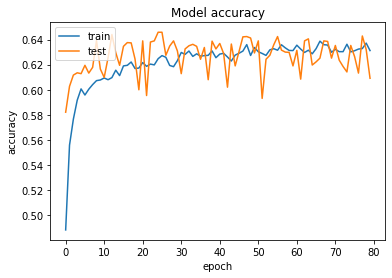

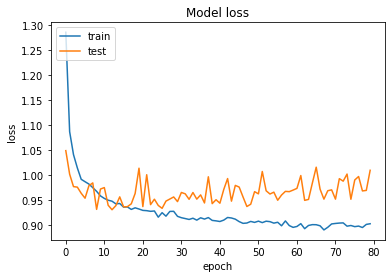

69/69 [==============================] - 1s 12ms/step
[[ 34  85  96   0  23   0   1  12   9   9]
 [ 36  42  43   5  41   0  24   5   2  16]
 [236 540 478  19 102   1  21  65  78  28]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   1   1   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 36  31  39   1   5   0   0   7   4   0]
 [  1   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


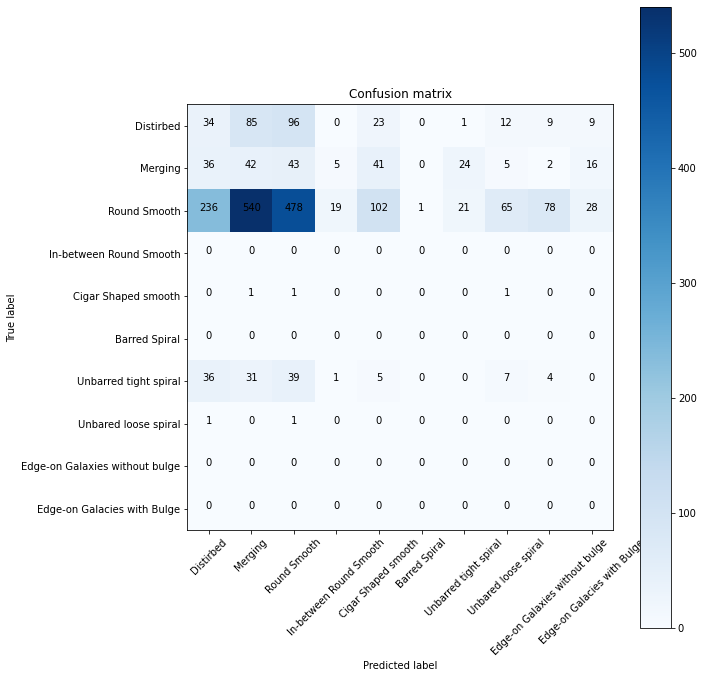

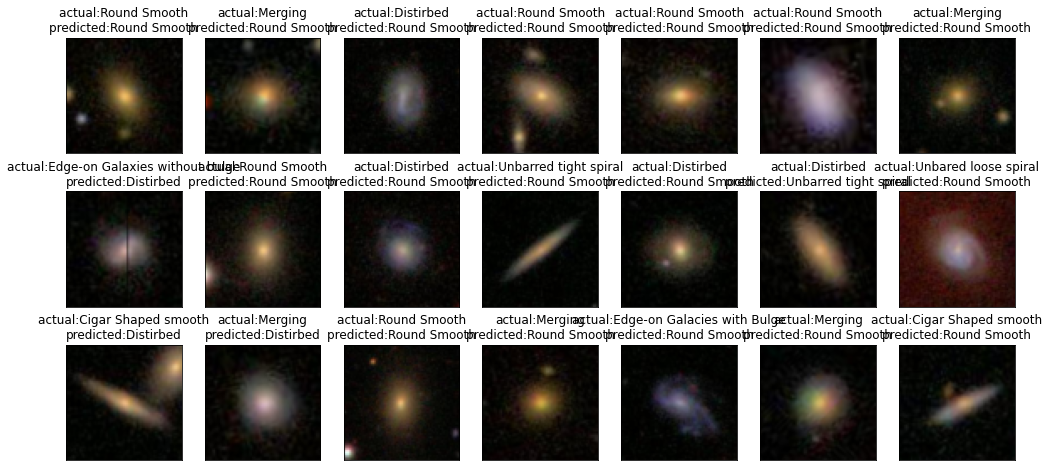

In [ ]:
    fig = plt.gcf()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    fig = plt.gcf()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    pred = model.predict(X_test)

    pred_label = np.argmax(pred, axis=1)
    actual_label = np.argmax(test_labels, axis=1)

    cm = confusion_matrix(pred_label+1, actual_label+1)
    print (cm)
    plot_confusionM(cm, imageLabel)

    pred = model.predict(X_test)
    pred_label = np.argmax(pred, axis=1)
    actual_label = np.argmax(test_labels, axis=1)

    cm = confusion_matrix(pred_label+1, actual_label+1)
    print (cm)
    print("precision and recall:", myscores(cm))
    plot_confusionM(cm, imageLabel)

    fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
    index = 0
    for i in range(3):
        for j in range(7):
            axes[i,j].set_title('actual:' + imageLabel[actual_label[index]] + '\n' 
                                + 'predicted:' + imageLabel[pred_label[index]])
            axes[i,j].imshow(test_images[index].astype(np.uint8), cmap='gray')
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            index += 1
    plt.show()

Efficientnet as feature extractor